In [43]:
import tensorflow as tf

a=3
w=tf.Variable([[1.5,1.0]])
x=tf.Variable([[2.0],[3.0]])

y=tf.matmul(w,x)
print (w.shape,x.shape)
init=tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    # 查看具体的值需要使用eval
    print(w.eval(),x.eval())
    print(y.eval())
    
# float32 int32 
zeros=tf.zeros([3,4],dtype="int32")
ones=tf.ones([3,4])

print(zeros,ones)

(1, 2) (2, 1)
[[1.5 1. ]] [[2.]
 [3.]]
[[6.]]
Tensor("zeros_7:0", shape=(3, 4), dtype=int32) Tensor("ones_2:0", shape=(3, 4), dtype=float32)


In [52]:
#高斯分布 均值方差
norm=tf.random_normal([2,3],mean=-1,stddev=4)
c=tf.constant([[1,2],[3,4],[5,6]])
shuff=tf.random_shuffle(c)
with tf.Session() as sess:
    print(sess.run(norm))
    print(sess.run(shuff))

    
state=tf.Variable(0)
# tf.constant(1)可以直接写1
new_value=tf.add(state,tf.constant(1))

update=tf.assign(state,new_value)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(update))
    for _ in range(3):
        sess.run(update)
#         打印值必须run
        print(sess.run(state))

[[-3.5924516 -4.852844   3.4568405]
 [-7.3886704 -6.5216393  3.2737846]]
[[1 2]
 [5 6]
 [3 4]]
1
2
3
4


In [70]:

w=tf.Variable([[0.5,1.0]])
x=tf.Variable([[1.0],[3.0]])
y=tf.matmul(w,x)
# 保存sess
saver=tf.train.Saver()
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    
    save_path=saver.save(sess,"./test")
    print("sava_path",save_path)
    

sava_path ./test


In [91]:
# numpy 转换成tensorflow格式
import numpy as np
a=np.zeros((3,3))
ta=tf.convert_to_tensor(a)
with tf.Session() as sess:
    print(a,sess.run(ta))
    
input1=tf.placeholder(tf.float32,shape=(1,2))
input2=tf.placeholder(tf.float32,shape=(2,1))
output=tf.matmul(input1,input2)

with tf.Session() as sess:
    print(11)
    sess.run(output,feed_dict={input1:[[1,2]],input2:[[1],[2]]})

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
11


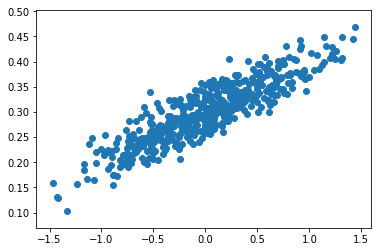

W= [-0.13717198] b= [0.] loss= 0.10739404
W= [-0.06753633] b= [0.3003475] loss= 0.008885139
W= [-0.01831959] b= [0.30042714] loss= 0.0047627646
W= [0.016223] b= [0.30048338] loss= 0.002732133
W= [0.04046659] b= [0.30052286] loss= 0.001731867
W= [0.05748186] b= [0.30055058] loss= 0.0012391481
W= [0.06942397] b= [0.30057004] loss= 0.0009964408
W= [0.07780549] b= [0.3005837] loss= 0.0008768857
W= [0.08368803] b= [0.3005933] loss= 0.0008179944
W= [0.08781667] b= [0.3006] loss= 0.00078898517
W= [0.09071434] b= [0.30060473] loss= 0.0007746956
W= [0.09274806] b= [0.30060804] loss= 0.0007676567
W= [0.09417542] b= [0.30061036] loss= 0.00076418946
W= [0.0951772] b= [0.300612] loss= 0.00076248153
W= [0.0958803] b= [0.30061314] loss= 0.0007616402
W= [0.09637377] b= [0.30061394] loss= 0.0007612259
W= [0.09672011] b= [0.3006145] loss= 0.00076102157
W= [0.09696318] b= [0.3006149] loss= 0.00076092116
W= [0.09713379] b= [0.30061516] loss= 0.00076087157
W= [0.09725352] b= [0.30061537] loss= 0.0007608471

In [111]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#生产随机点
num_point=500
vectors_set=[]
for i in range(num_point):
    x1=np.random.normal(0.0,0.55)
    y1=x1*0.1+0.3+np.random.normal(0.0,0.03)
    vectors_set.append([x1,y1])
    
x_data=[v[0] for v in vectors_set]
y_data=[v[1] for v in vectors_set]


plt.scatter(x_data,y_data)
plt.show()

W=tf.Variable(tf.random_uniform([1],-1.0,1.0),name="W")
b=tf.Variable(tf.zeros([1]),name="b")
y=W*x_data+b

# 均方差
loss=tf.reduce_mean(tf.square(y-y_data),name="loss")

# 优化项（学习率）
optimizer=tf.train.GradientDescentOptimizer(0.5)

train=optimizer.minimize(loss,name="train")

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print("W=",sess.run(W),"b=",sess.run(b),"loss=",sess.run(loss))
    for i in range(20):
        sess.run(train)
        print("W=",sess.run(W),"b=",sess.run(b),"loss=",sess.run(loss))
 

In [113]:
%matplotlib inline
from __future__ import division,print_function,absolute_import
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#导入数据集
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("/tmp/data/",one_hot=True)

#定义学习率
learning_rate=0.01

#中间层神经元个数
n_hidden=256

#输入层神经元个数
n_input=784

#待输入数据
X=tf.placeholder("float",[None,n_input])

#权重
weights={
    'encoder_w':tf.Variable(tf.random_normal([n_input,n_hidden])),
    'decoder_w':tf.Variable(tf.random_normal([n_hidden,n_input])),
}

#定义偏置
biases={
    'encoder_b':tf.Variable(tf.random_normal([n_hidden])),
    'decoder_b':tf.Variable(tf.random_normal([n_input])),
}

#编码过程
def encoder(x):
    return tf.nn.sigmoid(tf.add(tf.matmul(x,weights['encoder_w']),biases['encoder_b']))

#解码过程
def decoder(x):
    return tf.nn.sigmoid(tf.add(tf.matmul(x,weights['decoder_w']),biases['decoder_b']))

#编码开始
encoder_op=encoder(X)

#解码开始
decoder_op=decoder(encoder_op)

#预测值
y_pred=decoder_op

#真实输入值
y_true=X

#代价函数
cost=tf.reduce_mean(tf.pow(y_true-y_pred,2))

#优化过程
optimizer=tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

init=tf.initialize_all_variables()

with tf.Session() as sess:
    sess.run(init)
    for epoch  in range(10):#训练十轮
        for i in range(300):#每轮训练300次
            batch_xs,batch_ys=mnist.train.next_batch(256)#每个步骤随机抓取256个批处理数据点
            _,c=sess.run([optimizer,cost],feed_dict={X:batch_xs})#运行
        print("epoch",'%04d'%(epoch+1),"cost","{:.9f}".format(c))
    
    print("结束")
    #评估模型
    encode_decode=sess.run(y_pred,feed_dict={X:mnist.test.images[:10]})
    
    f,a=plt.subplots(2,10,figsize=(10,2))
    
    for i in range(10):
        a[0][i].imshow(np.reshape(mnist.test.images[i],(28,28)))
        a[1][i].imshow(np.reshape(encode_decode[i],(28,28)))
        
    f.show()
    plt.draw()
        


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:841)>